<a href="https://colab.research.google.com/github/Aldoptma0704/Image-Enhancement-Segmentation/blob/main/Image_Enhancement_%26_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import wiener
from skimage import exposure

#Teknik Peningkatan Citra

##Filtering dengan Operator Morfologi (Dilasi dan Erosi)

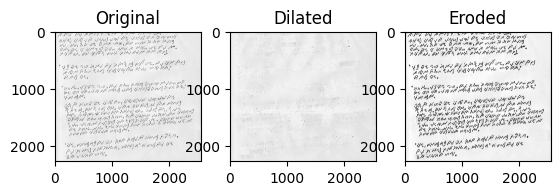

In [ ]:
image = cv2.imread('Output/ba03-006-p0.ppm', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

dilated_image = cv2.dilate(image, kernel, iterations=1)

eroded_image = cv2.erode(image, kernel, iterations=1)

plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 3, 2), plt.imshow(dilated_image, cmap='gray'), plt.title('Dilated')
plt.subplot(1, 3, 3), plt.imshow(eroded_image, cmap='gray'), plt.title('Eroded')
plt.show()

##Histogram Equalization

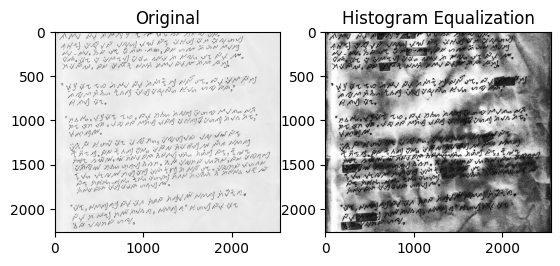

In [ ]:
equalized_image = cv2.equalizeHist(image)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(equalized_image, cmap='gray'), plt.title('Histogram Equalization')
plt.show()


##Penghilangan Noise (Filter Wiener)

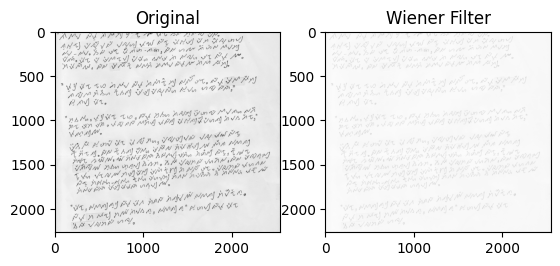

In [ ]:
wiener_image = wiener(image)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(wiener_image, cmap='gray'), plt.title('Wiener Filter')
plt.show()

##Penyesuaian Kontras Linear

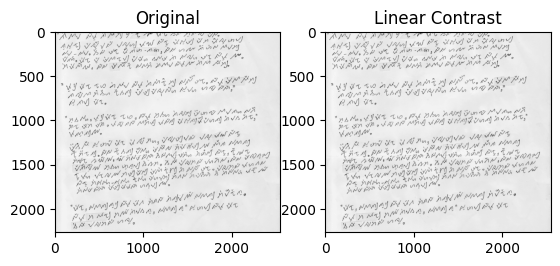

In [ ]:
min_val = 50
max_val = 200
linear_adjusted = cv2.normalize(image, None, min_val, max_val, cv2.NORM_MINMAX)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(linear_adjusted, cmap='gray'), plt.title('Linear Contrast')
plt.show()

##Median Filtering

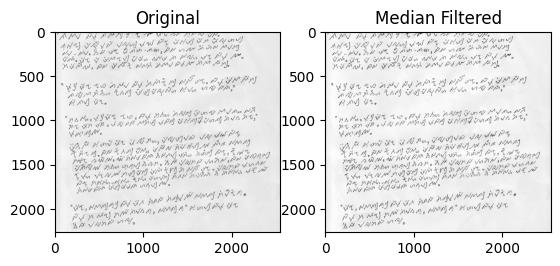

In [ ]:
median_filtered = cv2.medianBlur(image, 5)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(median_filtered, cmap='gray'), plt.title('Median Filtered')
plt.show()

##Unsharp Mask Filtering

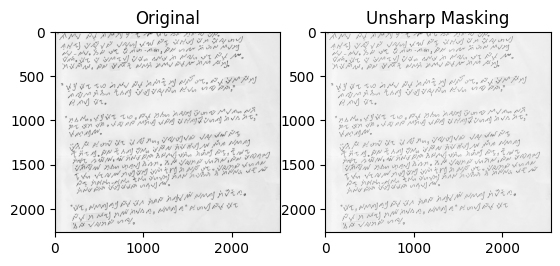

In [ ]:
gaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
unsharp_image = cv2.addWeighted(image, 1.5, gaussian, -0.5, 0)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(unsharp_image, cmap='gray'), plt.title('Unsharp Masking')
plt.show()

##CLAHE (Contrast-Limited Adaptive Histogram Equalization)

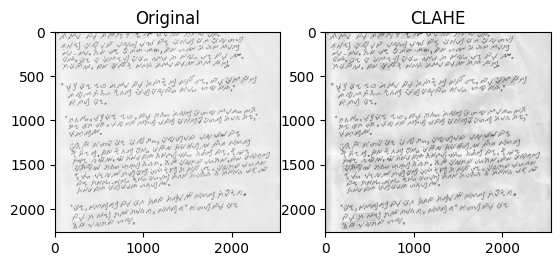

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(image)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(clahe_image, cmap='gray'), plt.title('CLAHE')
plt.show()

##Decorrelation Stretch (Menggunakan skimage)

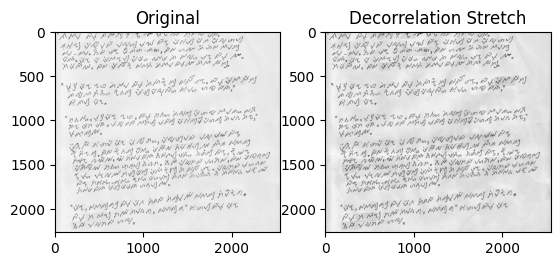

In [ ]:
decorrelated_image = exposure.equalize_adapthist(image)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(1, 2, 2), plt.imshow(decorrelated_image, cmap='gray'), plt.title('Decorrelation Stretch')
plt.show()

#Teknik Segmentasi Citra

##Segmentasi dengan K-Means Clustering

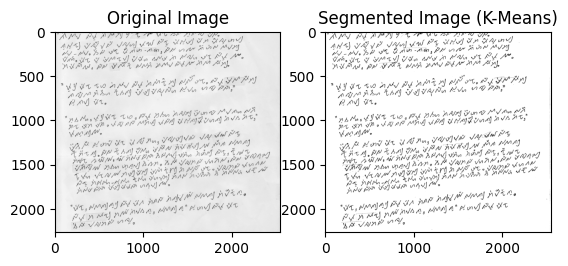

In [ ]:
pixel_values = image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(segmented_image, cmap='gray'), plt.title('Segmented Image (K-Means)')
plt.show()

##Segmentasi dengan Contour Detection

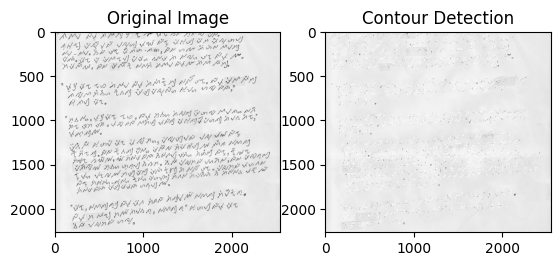

In [ ]:
edges = cv2.Canny(image, 100, 200)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(contour_image, cmap='gray'), plt.title('Contour Detection')
plt.show()

##Segmentasi dengan Thresholding

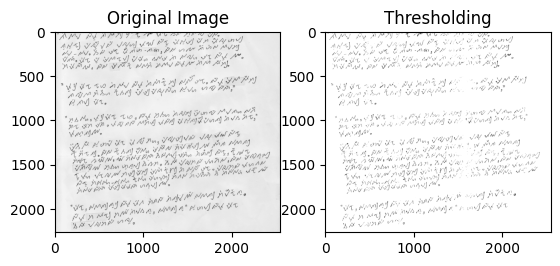

In [ ]:
_, thresholded_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(thresholded_image, cmap='gray'), plt.title('Thresholding')
plt.show()

##Segmentasi dengan Color Masking

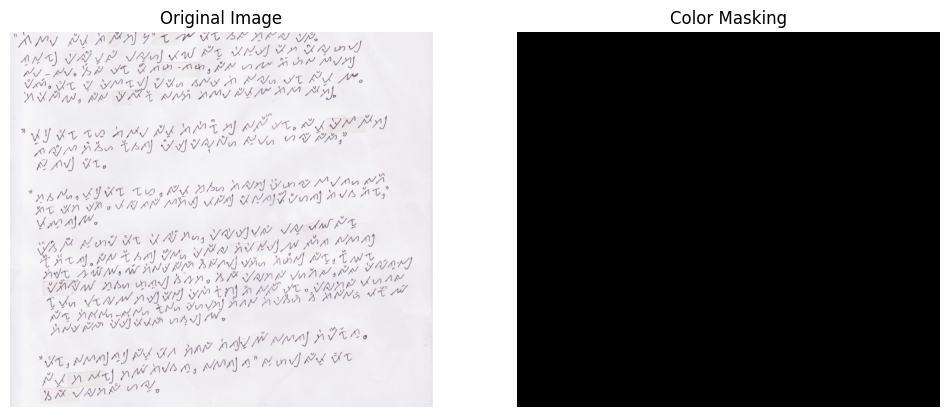

In [ ]:
color_image = cv2.imread('Output/ba03-006-p0.ppm', cv2.IMREAD_COLOR)

hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

lower_range = np.array([35, 100, 100])
upper_range = np.array([85, 255, 255])

mask = cv2.inRange(hsv_image, lower_range, upper_range)

masked_image = cv2.bitwise_and(color_image, color_image, mask=mask)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Color Masking')
plt.axis('off')

plt.show()